In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import librosa
import librosa.display
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import IPython
import tensorflow.keras.layers as L
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
import re
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

C:\Users\User\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
Crema_Path=(r"C:\Users\User\Downloads\archive (3)\Crema")
Ravdess_Path=(r"C:\Users\User\Downloads\archive (3)\Ravdess\audio_speech_actors_01-24")
Savee_Path=(r"C:\Users\User\Downloads\archive (3)\Savee")
Tess_Path=(r"C:\Users\User\Downloads\archive (3)\Tess")

In [3]:
crema=[]
for wav in os.listdir(Crema_Path):
    emotion=wav.partition(".wav")[0].split('_')
    if emotion[2]=='SAD':
        crema.append(('sad',Crema_Path+'/'+wav))
    elif emotion[2]=='ANG':
        crema.append(('angry',Crema_Path+'/'+wav))
    elif emotion[2]=='DIS':
        crema.append(('disgust',Crema_Path+'/'+wav))
    elif emotion[2]=='FEA':
        crema.append(('fear',Crema_Path+'/'+wav))
    elif emotion[2]=='HAP':
        crema.append(('happy',Crema_Path+'/'+wav))
    elif emotion[2]=='NEU':
        crema.append(('neutral',Crema_Path+'/'+wav))
    else:
        crema.append(('unknown',Crema_Path+'/'+wav))
Crema_df=pd.DataFrame.from_dict(crema)
Crema_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Crema_df.head()

,Emotion,File_Path
0,angry,C:\Users\User\Downloads\archive (3)\Crema/1001...
1,disgust,C:\Users\User\Downloads\archive (3)\Crema/1001...
2,fear,C:\Users\User\Downloads\archive (3)\Crema/1001...
3,happy,C:\Users\User\Downloads\archive (3)\Crema/1001...
4,neutral,C:\Users\User\Downloads\archive (3)\Crema/1001...


In [4]:
Crema_df['Emotion'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad'],
      dtype=object)

In [5]:
ravdess=[]
for directory in os.listdir(Ravdess_Path):
    actors=os.listdir(os.path.join(Ravdess_Path,directory))
    for wav in actors:
        emotion=wav.partition('.wav')[0].split('-')
        emotion_number=int(emotion[2])
        ravdess.append((emotion_number,os.path.join(Ravdess_Path,directory,wav)))
Ravdess_df=pd.DataFrame.from_dict(ravdess)
Ravdess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Ravdess_df['Emotion'].replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace=True)
Ravdess_df.head()

,Emotion,File_Path
0,neutral,C:\Users\User\Downloads\archive (3)\Ravdess\au...
1,neutral,C:\Users\User\Downloads\archive (3)\Ravdess\au...
2,neutral,C:\Users\User\Downloads\archive (3)\Ravdess\au...
3,neutral,C:\Users\User\Downloads\archive (3)\Ravdess\au...
4,neutral,C:\Users\User\Downloads\archive (3)\Ravdess\au...


In [6]:
Ravdess_df['Emotion'].unique()

array(['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise'],
      dtype=object)

In [7]:
savee=[]
for wav in os.listdir(Savee_Path):
    emo=wav.partition('.wav')[0].split('_')[1].replace(r'[0-9]','')
    emotion=re.split(r'[0-9]',emo)[0]
    if emotion=='a':
        savee.append(('angry',Savee_Path+'/'+wav))
    elif emotion=='d':
        savee.append(('disgust',Savee_Path+'/'+wav))
    elif emotion=='f':
        savee.append(('fear',Savee_Path+'/'+wav))
    elif emotion=='h':
        savee.append(('happy',Savee_Path+'/'+wav))
    elif emotion=='n':
        savee.append(('neutral',Savee_Path+'/'+wav))
    elif emotion=='sa':
        savee.append(('sad',Savee_Path+'/'+wav))
    elif emotion=='su':
        savee.append(('surprise',Savee_Path+'/'+wav))
Savee_df=pd.DataFrame.from_dict(savee)
Savee_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Savee_df.head()

,Emotion,File_Path
0,angry,C:\Users\User\Downloads\archive (3)\Savee/DC_a...
1,angry,C:\Users\User\Downloads\archive (3)\Savee/DC_a...
2,angry,C:\Users\User\Downloads\archive (3)\Savee/DC_a...
3,angry,C:\Users\User\Downloads\archive (3)\Savee/DC_a...
4,angry,C:\Users\User\Downloads\archive (3)\Savee/DC_a...


In [8]:
tess=[]
for directory in os.listdir(Tess_Path):
    for wav in os.listdir(os.path.join(Tess_Path,directory)):
        emotion=wav.partition('.wav')[0].split('_')
        if emotion[2]=='ps':
            tess.append(('surprise',os.path.join(Tess_Path,directory,wav)))
        else:
            tess.append((emotion[2],os.path.join(Tess_Path,directory,wav)))
Tess_df=pd.DataFrame.from_dict(tess)
Tess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Tess_df.head()

,Emotion,File_Path
0,angry,C:\Users\User\Downloads\archive (3)\Tess\OAF_a...
1,angry,C:\Users\User\Downloads\archive (3)\Tess\OAF_a...
2,angry,C:\Users\User\Downloads\archive (3)\Tess\OAF_a...
3,angry,C:\Users\User\Downloads\archive (3)\Tess\OAF_a...
4,angry,C:\Users\User\Downloads\archive (3)\Tess\OAF_a...


In [9]:
Tess_df['Emotion'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'surprise', 'sad'],
      dtype=object)

In [10]:
main_df=pd.concat([Crema_df,Ravdess_df,Savee_df,Tess_df],axis=0)
main_df.shape

(12162, 2)

In [11]:
main_df.head(15)

,Emotion,File_Path
0,angry,C:\Users\User\Downloads\archive (3)\Crema/1001...
1,disgust,C:\Users\User\Downloads\archive (3)\Crema/1001...
2,fear,C:\Users\User\Downloads\archive (3)\Crema/1001...
3,happy,C:\Users\User\Downloads\archive (3)\Crema/1001...
4,neutral,C:\Users\User\Downloads\archive (3)\Crema/1001...
5,sad,C:\Users\User\Downloads\archive (3)\Crema/1001...
6,angry,C:\Users\User\Downloads\archive (3)\Crema/1001...
7,angry,C:\Users\User\Downloads\archive (3)\Crema/1001...
8,angry,C:\Users\User\Downloads\archive (3)\Crema/1001...
9,disgust,C:\Users\User\Downloads\archive (3)\Crema/1001...


In [12]:
main_df.tail(15)

,Emotion,File_Path
2785,sad,C:\Users\User\Downloads\archive (3)\Tess\YAF_s...
2786,sad,C:\Users\User\Downloads\archive (3)\Tess\YAF_s...
2787,sad,C:\Users\User\Downloads\archive (3)\Tess\YAF_s...
2788,sad,C:\Users\User\Downloads\archive (3)\Tess\YAF_s...
2789,sad,C:\Users\User\Downloads\archive (3)\Tess\YAF_s...
2790,sad,C:\Users\User\Downloads\archive (3)\Tess\YAF_s...
2791,sad,C:\Users\User\Downloads\archive (3)\Tess\YAF_s...
2792,sad,C:\Users\User\Downloads\archive (3)\Tess\YAF_s...
2793,sad,C:\Users\User\Downloads\archive (3)\Tess\YAF_s...
2794,sad,C:\Users\User\Downloads\archive (3)\Tess\YAF_s...


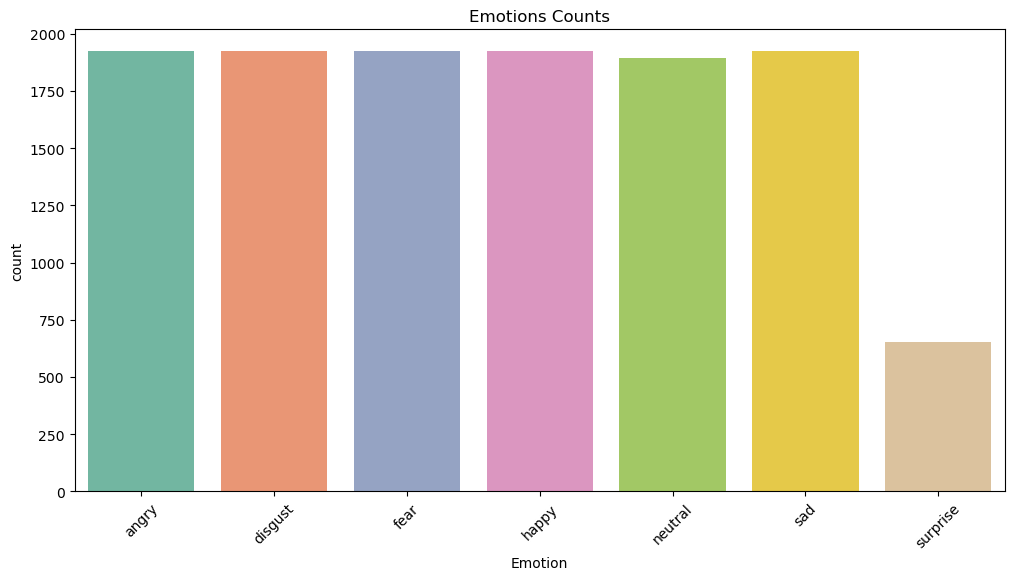

In [13]:
plt.figure(figsize=(12,6))
plt.title('Emotions Counts')
emotions=sns.countplot(x='Emotion',data=main_df,palette='Set2')
emotions.set_xticklabels(emotions.get_xticklabels(),rotation=45)
plt.show()

In [14]:
emotion_names=main_df['Emotion'].unique()

In [15]:
colors={'disgust':'#804E2D','happy':'#F19C0E','sad':'#478FB8','neutral':'#4CB847','fear':'#7D55AA','angry':'#C00808','surprise':'#EE00FF'}

In [16]:
def wave_plot(data,sr,emotion,color):
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for waveplot',size=17)
    librosa.display.waveshow(y=data,sr=sr,color=color)

In [17]:
def spectogram(data,sr,emotion):
    audio=librosa.stft(data)
    audio_db=librosa.amplitude_to_db(abs(audio))
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for spectogram',size=17)
    librosa.display.specshow(audio_db,sr=sr,x_axis='time',y_axis='hz')

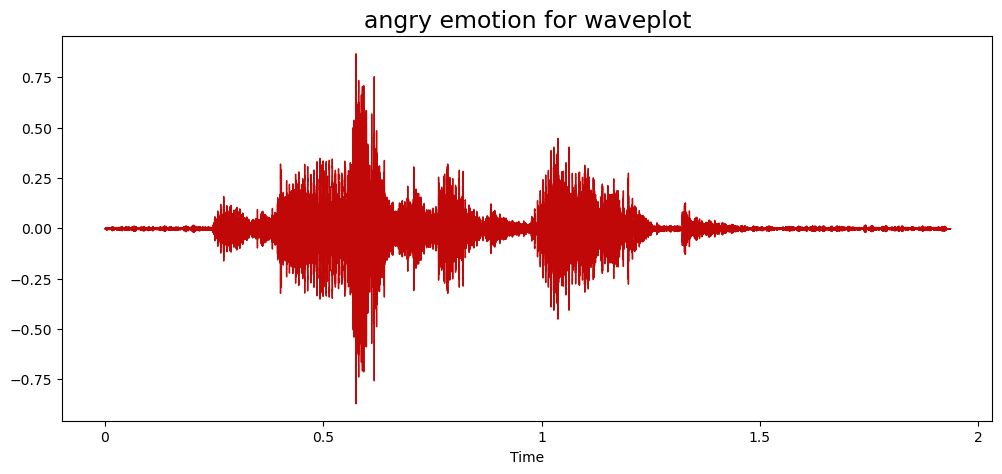

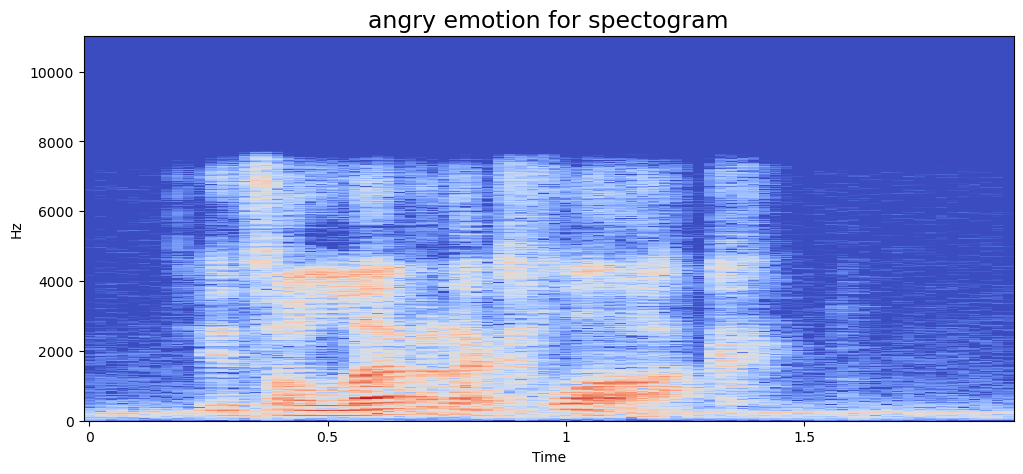

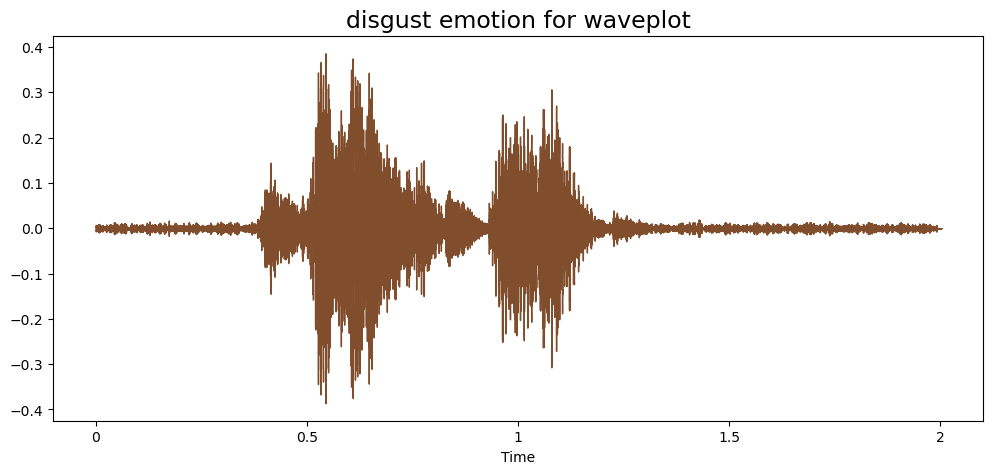

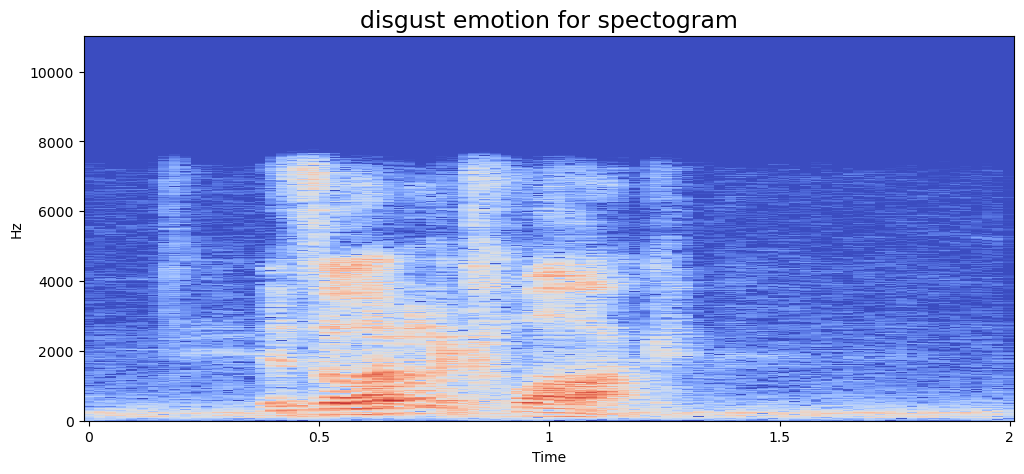

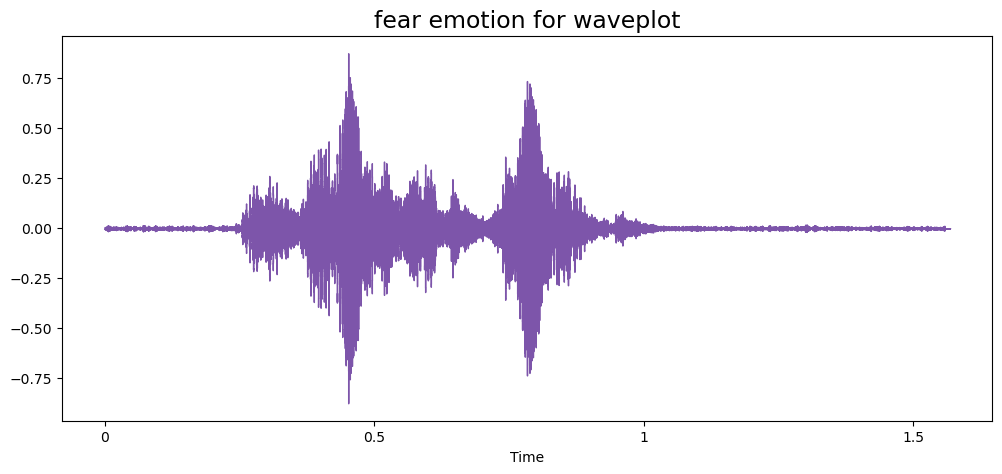

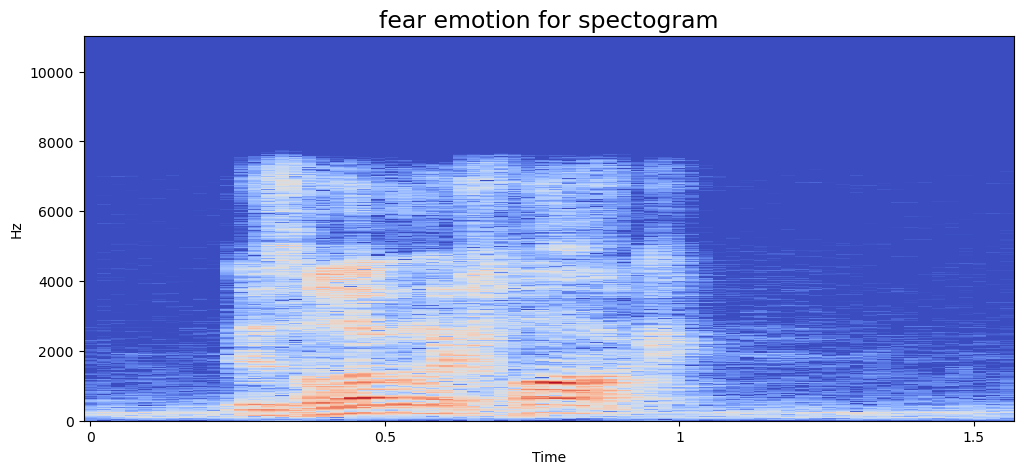

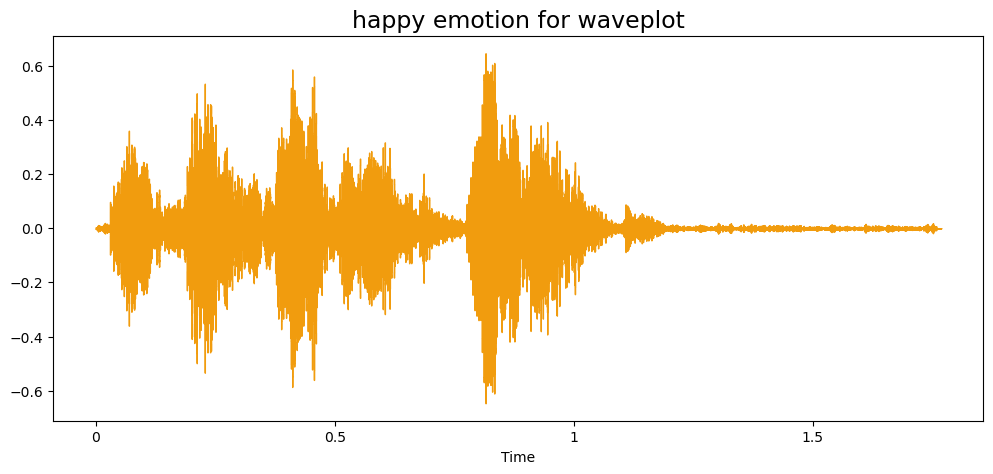

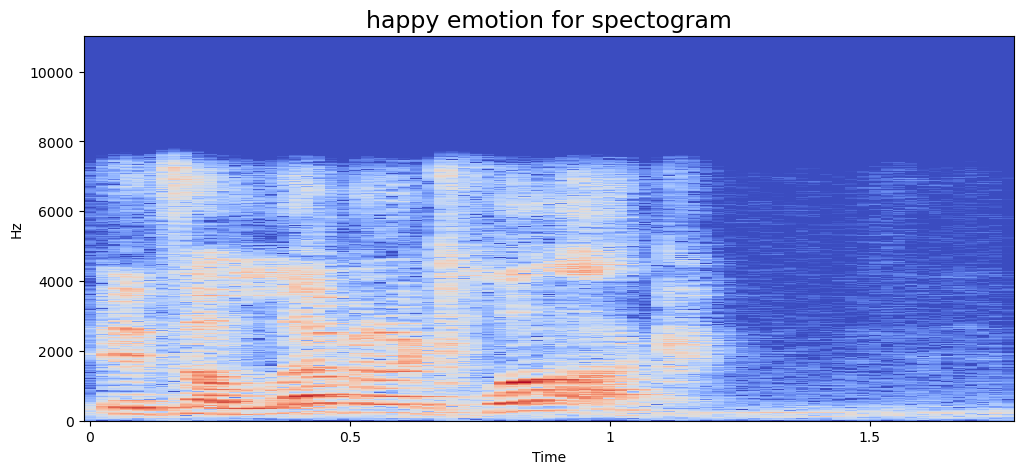

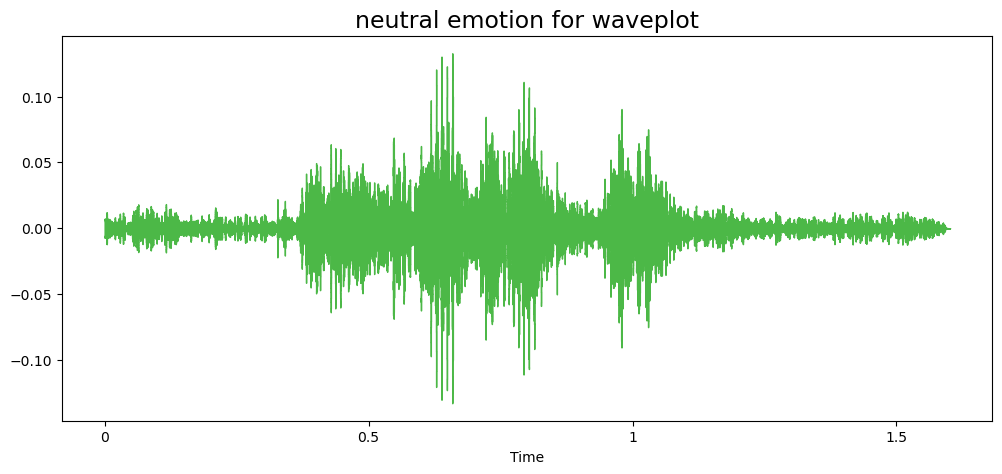

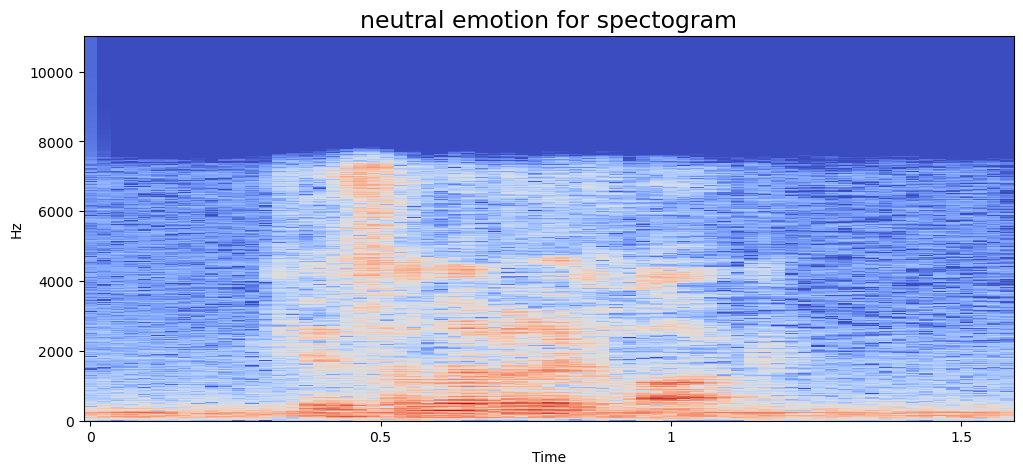

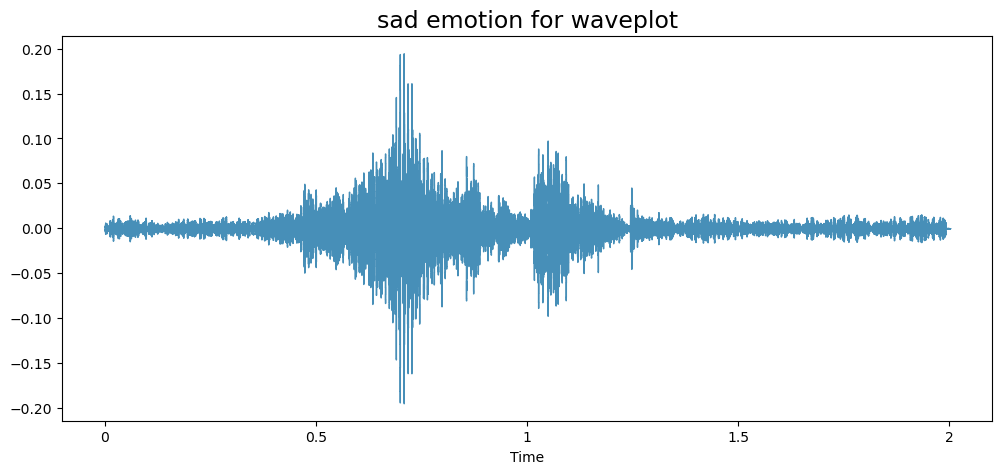

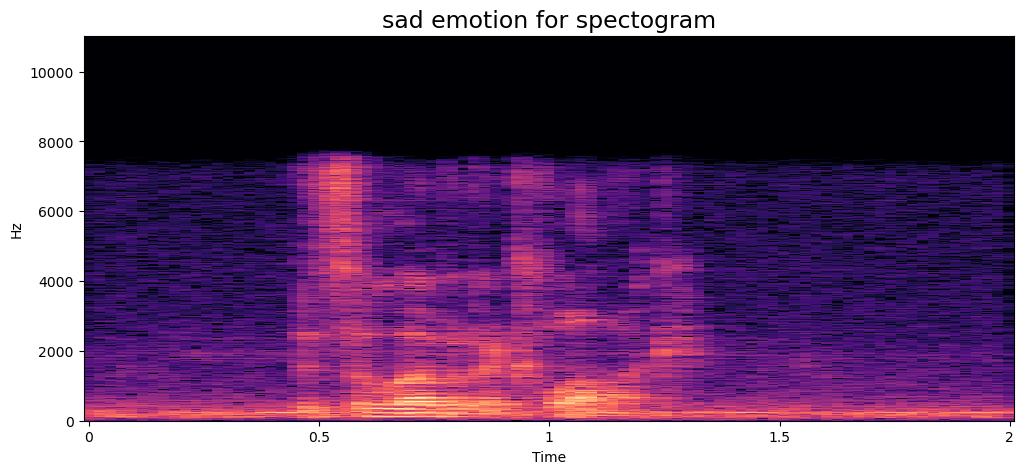

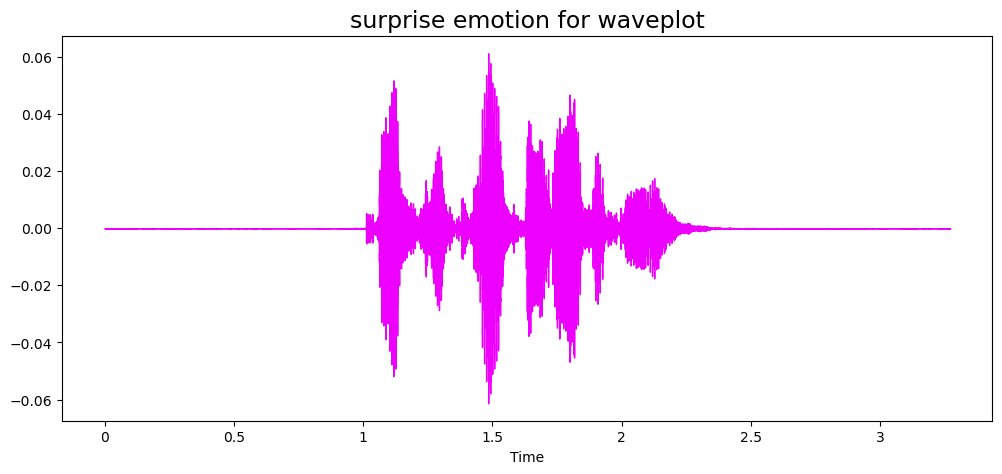

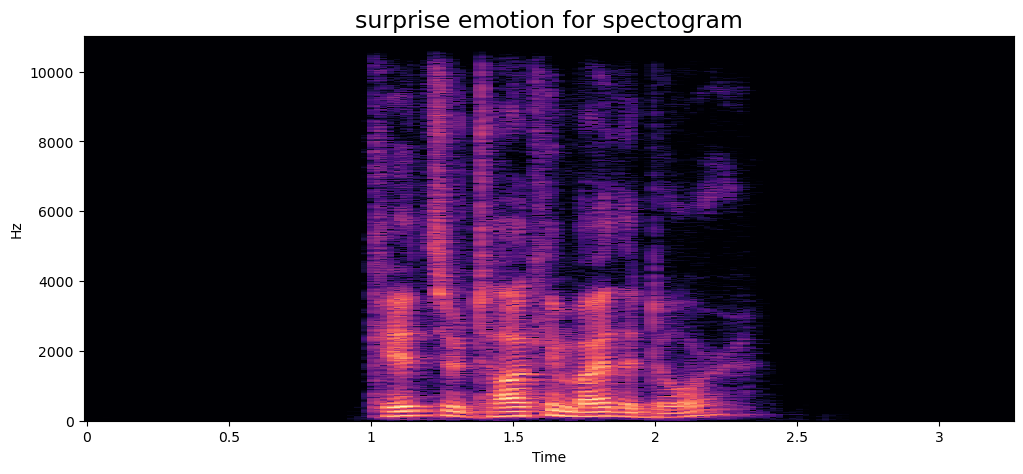

In [18]:
audio_path=[]
for emotion in emotion_names:
    path=np.array(main_df['File_Path'][main_df['Emotion']==emotion])[1]
    data,sr=librosa.load(path)
    wave_plot(data,sr,emotion,colors[emotion])
    spectogram(data,sr,emotion)
    audio_path.append(path)